In [262]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# data set from: https://finance.yahoo.com/quote/TSLA/history
#                https://finance.yahoo.com/quote/%5ESPX/history/

In [263]:
TSLA = pd.read_csv('TSLA.csv')
TSLA = TSLA[TSLA['Date'] > "2010-06-30"]
TSLA = TSLA[TSLA['Date'] < "2023-12-31"]
TSLA['Date'] = pd.to_datetime(TSLA['Date'])
TSLA.index = TSLA['Date']
TSLA.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-12-22,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
2023-12-28,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
2023-12-29,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


<Axes: xlabel='Date'>

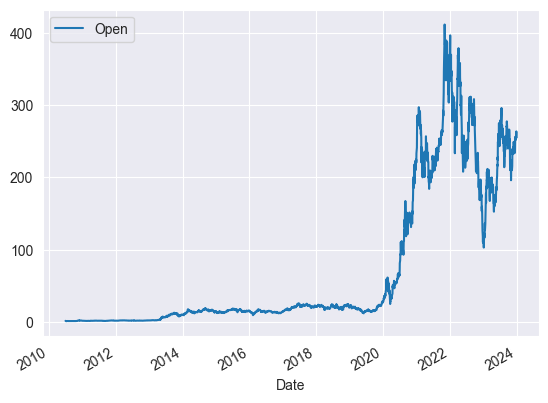

In [264]:
TSLA.plot(x='Date', y='Open')

In [265]:
#upsample the TSLA to fill missing data.
TSLA_upsampled = TSLA.resample('D').interpolate(method='linear')
TSLA_upsampled.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-12-25,2023-12-25,255.057506,258.032501,252.525002,255.592487,255.592487,88481750.0
2023-12-26,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400.0
2023-12-27,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400.0
2023-12-28,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900.0
2023-12-29,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300.0


In [266]:
interest_rate = pd.read_csv('FEDFUNDS.csv')
interest_rate = interest_rate[interest_rate['DATE'] > "2010-06-30"]
interest_rate = interest_rate[interest_rate['DATE'] < "2024-01-02"]
interest_rate['DATE'] = pd.to_datetime(interest_rate['DATE'])
interest_rate.index = interest_rate['DATE']
interest_rate.tail()

,DATE,FEDFUNDS
DATE,,
2023-09-01,2023-09-01,5.33
2023-10-01,2023-10-01,5.33
2023-11-01,2023-11-01,5.33
2023-12-01,2023-12-01,5.33
2024-01-01,2024-01-01,5.33


<Axes: xlabel='DATE'>

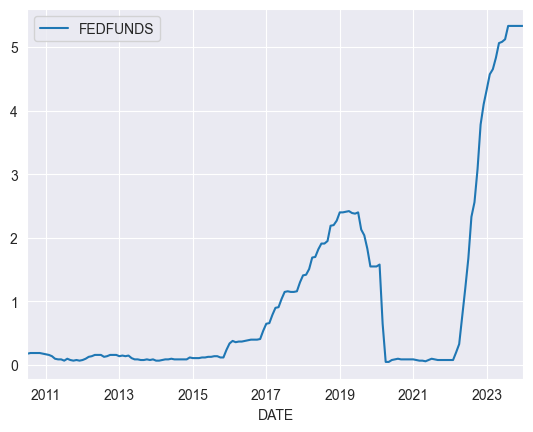

In [267]:
interest_rate.plot(x='DATE')

In [268]:
#upsample the interest rate from each month to each day
interest_rate_upsampled = interest_rate.resample('D').interpolate(method='linear')
interest_rate_upsampled.tail()

,DATE,FEDFUNDS
DATE,,
2023-12-28,2023-12-28,5.33
2023-12-29,2023-12-29,5.33
2023-12-30,2023-12-30,5.33
2023-12-31,2023-12-31,5.33
2024-01-01,2024-01-01,5.33


In [269]:
#merge two dataset to one dataframe
TSLA_cols = TSLA_upsampled.columns[1:7]
interest_rate_cols = interest_rate_upsampled.columns[1]
df = TSLA_upsampled[TSLA_cols].astype(float)
df.insert(6, "Interest_rate", interest_rate_upsampled[interest_rate_cols].astype(float))
df.head()

,Open,High,Low,Close,Adj Close,Volume,Interest_rate
Date,,,,,,,
2010-07-01,1.666667,1.728000,1.351333,1.4640,1.4640,123282000.0,0.180000
2010-07-02,1.533333,1.540000,1.247333,1.2800,1.2800,77097000.0,0.180323
2010-07-03,1.483333,1.488333,1.199333,1.2285,1.2285,83573625.0,0.180645
2010-07-04,1.433333,1.436667,1.151333,1.1770,1.1770,90050250.0,0.180968
2010-07-05,1.383333,1.385000,1.103333,1.1255,1.1255,96526875.0,0.181290


In [270]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Interest_rate
Date,,,,,,,
2023-12-25,255.057506,258.032501,252.525002,255.592487,255.592487,88481750.0,5.33
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400.0,5.33
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400.0,5.33
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900.0,5.33
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300.0,5.33
